In [3]:
import pandas as pd
df = pd.read_excel('/content/titanic3.xls')
display(df.head())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Task
Analyze the "titanic3.xls" dataset to prepare it for machine learning, visualize outliers using box plots, train and evaluate a classification model to predict survival, train and evaluate a regression model to predict fare, and summarize the findings from both models.

## Prepare Data for Modeling

### Subtask:
Clean the dataset by handling missing values, encoding categorical features, and selecting appropriate features for both classification and regression tasks.


**Reasoning**:
The first step in cleaning the dataset is to drop columns that are not useful for machine learning or have too many missing values, as specified in the instructions. This helps in reducing noise and dimensionality.



In [4]:
df = df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
print("Dropped columns: 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'")
print(df.head())

Dropped columns: 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'
   pclass  survived     sex      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
2       1         0  female   2.0000      1      2  151.5500        S
3       1         0    male  30.0000      1      2  151.5500        S
4       1         0  female  25.0000      1      2  151.5500        S


**Reasoning**:
Following the instructions, the next step is to impute missing values in the 'age' column with its median. This is a common and robust strategy for numerical features to avoid data loss.



In [5]:
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)
print(f"Missing values in 'age' column imputed with median: {age_median}")
print(df.info())
print(df.head())

Missing values in 'age' column imputed with median: 28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB
None
   pclass  survived     sex      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
2       1         0  female   2.0000      1      2  151.5500        S
3       1         0    male  30.0000      1      2  151.5500        S
4       1         0  female  

/tmp/ipython-input-3973547732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_median, inplace=True)


**Reasoning**:
The next step in cleaning the data, as per the instructions, is to impute missing values in the 'fare' column with its median. This addresses another common missing data issue for a numerical feature.



In [6]:
fare_median = df['fare'].median()
df['fare'] = df['fare'].fillna(fare_median)
print(f"Missing values in 'fare' column imputed with median: {fare_median}")
print(df.info())
print(df.head())

Missing values in 'fare' column imputed with median: 14.4542
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB
None
   pclass  survived     sex      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
2       1         0  female   2.0000      1      2  151.5500        S
3       1         0    male  30.0000      1      2  151.5500        S
4       1         0  fema

**Reasoning**:
The instructions specify to impute missing values for the 'embarked' column with its most frequent value (mode). This handles categorical missing data effectively.



In [7]:
embarked_mode = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(embarked_mode)
print(f"Missing values in 'embarked' column imputed with mode: {embarked_mode}")
print(df.info())
print(df.head())

Missing values in 'embarked' column imputed with mode: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB
None
   pclass  survived     sex      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
2       1         0  female   2.0000      1      2  151.5500        S
3       1         0    male  30.0000      1      2  151.5500        S
4       1         0  female  

**Reasoning**:
As per the instructions, the next step is to convert the categorical 'sex' column into a numerical representation using mapping for machine learning readiness.



In [8]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
print("Converted 'sex' column to numerical (female: 0, male: 1).")
print(df.info())
print(df.head())

Converted 'sex' column to numerical (female: 0, male: 1).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 81.9+ KB
None
   pclass  survived  sex      age  sibsp  parch      fare embarked
0       1         1    0  29.0000      0      0  211.3375        S
1       1         1    1   0.9167      1      2  151.5500        S
2       1         0    0   2.0000      1      2  151.5500        S
3       1         0    1  30.0000      1      2  151.5500        S
4       1         0    0  25.0000      1   

**Reasoning**:
As instructed, the next step is to apply one-hot encoding to the 'pclass' and 'embarked' columns to transform these categorical features into a numerical format suitable for machine learning models, thereby completing the feature encoding part of the data cleaning process.



In [9]:
df = pd.get_dummies(df, columns=['pclass', 'embarked'], drop_first=True)
print("Applied one-hot encoding to 'pclass' and 'embarked' columns.")
print(df.info())
print(df.head())

Applied one-hot encoding to 'pclass' and 'embarked' columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    1309 non-null   int64  
 1   sex         1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   pclass_2    1309 non-null   bool   
 7   pclass_3    1309 non-null   bool   
 8   embarked_Q  1309 non-null   bool   
 9   embarked_S  1309 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 66.6 KB
None
   survived  sex      age  sibsp  parch      fare  pclass_2  pclass_3  \
0         1    0  29.0000      0      0  211.3375     False     False   
1         1    1   0.9167      1      2  151.5500     False     False   
2         0    0   2.0000      1      2  151.5500     Fa

## Visualize Outliers with Box Plots

### Subtask:
Generate box plots for numerical columns in the dataset to visually identify and understand the distribution of outliers. Ensure legends are provided for clarity.


**Reasoning**:
The first step, as per instructions, is to import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`, to prepare for generating box plots.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported matplotlib.pyplot as plt and seaborn as sns.")

Imported matplotlib.pyplot as plt and seaborn as sns.


**Reasoning**:
Following the instructions, I will now iterate through the specified numerical columns ('age', 'sibsp', 'parch', 'fare') and generate a box plot for each to visualize outliers, ensuring each plot has a title and y-axis label.



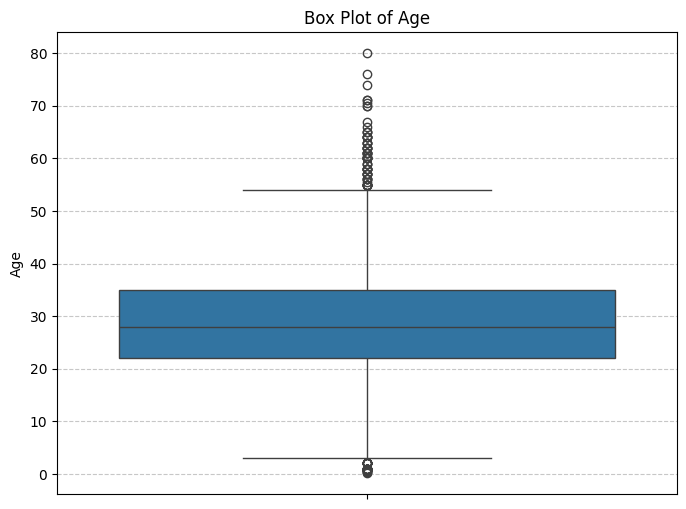

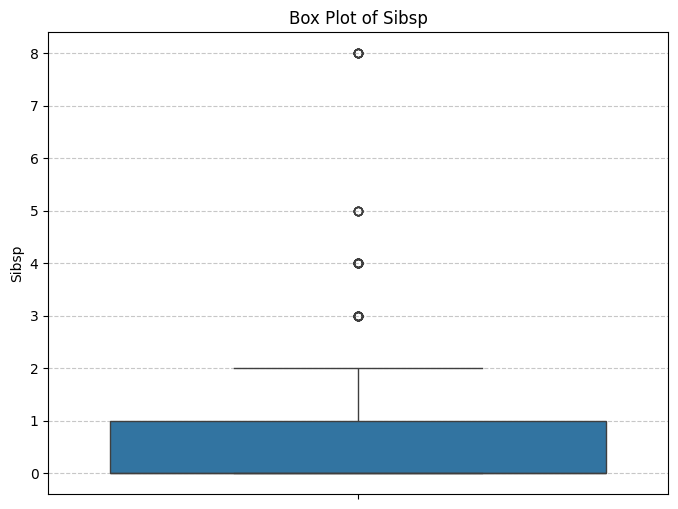

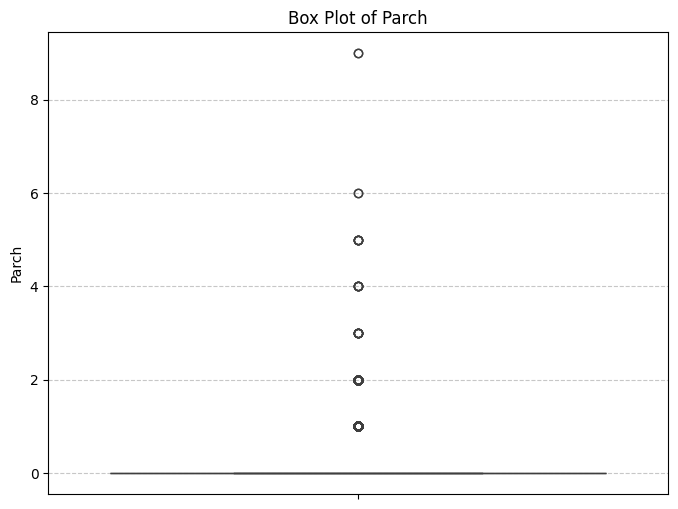

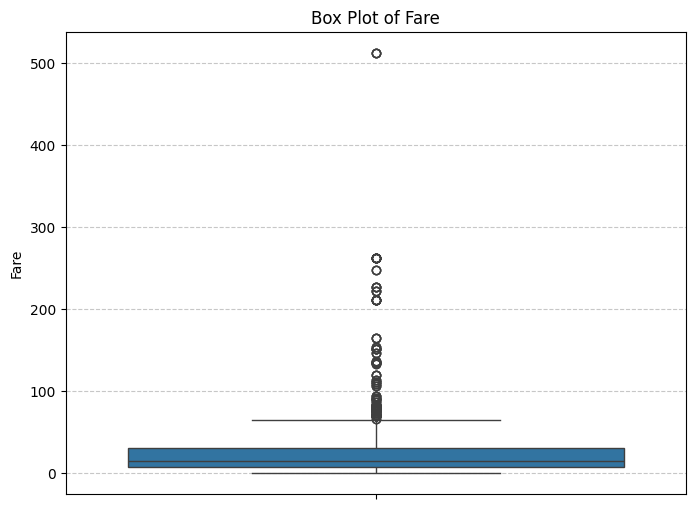

Generated box plots for numerical columns: 'age', 'sibsp', 'parch', 'fare'.


In [11]:
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.ylabel(col.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
print("Generated box plots for numerical columns: 'age', 'sibsp', 'parch', 'fare'.")

## Train and Evaluate Classification Model

### Subtask:
Train a classification model (e.g., Logistic Regression) using the prepared data to predict survival. Then, calculate and display the confusion matrix, accuracy, precision, recall, and F1-score. Additionally, visualize the confusion matrix as a heatmap. Ensure legends are provided for clarity.


**Reasoning**:
The first step in training and evaluating a classification model is to import all the necessary libraries from scikit-learn for model selection, metrics, and the Logistic Regression model itself, as specified in the instructions.



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported necessary libraries for model training and evaluation.")

Imported necessary libraries for model training and evaluation.


**Reasoning**:
As per the instructions, the next step is to define the features (X) and target (y) for the classification task, split the data into training and testing sets, initialize and train a Logistic Regression model, make predictions, calculate and print evaluation metrics, and finally, visualize the confusion matrix as a heatmap.



Data split into training and testing sets.
Logistic Regression model trained.
Predictions made on the test set.

Accuracy: 0.7748
Precision: 0.8172
Recall: 0.6441
F1-Score: 0.7204


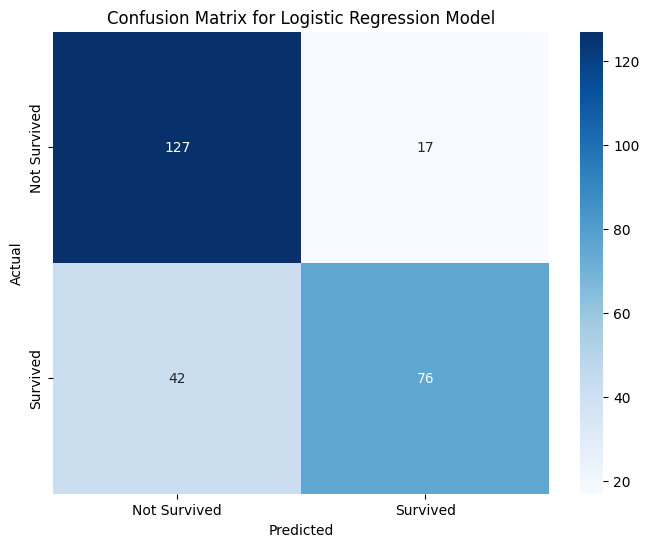

Confusion Matrix heatmap displayed.


In [13]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_pred = model.predict(X_test)
print("Predictions made on the test set.")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
print("Confusion Matrix heatmap displayed.")

## Train and Evaluate Regression Model

### Subtask:
Train a regression model (e.g., Linear Regression) using the prepared data to predict fare. Then, calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score. Additionally, visualize the predicted vs. actual fare values using a scatter plot. Ensure legends are provided for clarity.

**Reasoning**:
The first step in training and evaluating a regression model is to import all the necessary libraries from scikit-learn for model selection, metrics, and the Linear Regression model itself, as specified in the instructions.



In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported necessary libraries for regression model training and evaluation.")

Imported necessary libraries for regression model training and evaluation.


**Reasoning**:
As per the instructions, the next step is to define the features (X) and target (y) for the regression task, split the data into training and testing sets, initialize and train a Linear Regression model, make predictions, calculate and print evaluation metrics, and finally, visualize the predicted vs. actual fare values using a scatter plot.



Data split into training and testing sets for regression.
Linear Regression model trained.
Predictions made on the test set for regression.

Mean Absolute Error (MAE): 19.2655
Mean Squared Error (MSE): 1536.7494
R-squared (R2): 0.4215


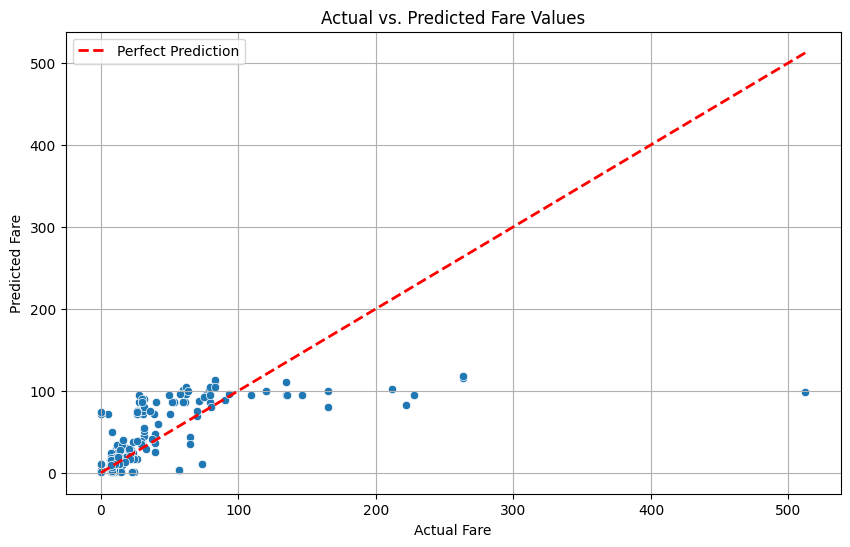

Scatter plot of actual vs. predicted fare values displayed.


In [15]:
X_reg = df.drop('fare', axis=1)
y_reg = df['fare']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print("Data split into training and testing sets for regression.")

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
print("Linear Regression model trained.")

y_pred_reg = reg_model.predict(X_test_reg)
print("Predictions made on the test set for regression.")

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Values')
plt.grid(True)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.legend()
plt.show()
print("Scatter plot of actual vs. predicted fare values displayed.")

## Summarize Findings

### Subtask:
Summarize the key findings from both the classification model (predicting survival) and the regression model (predicting fare), discussing their performance and any notable observations.

**Reasoning**:
Now that both the classification and regression models have been trained and evaluated, the final step is to summarize their performance and observations as described in the subtask.



In [16]:
print("--- Classification Model Summary (Survival Prediction) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Observations: The classification model achieved a decent accuracy for predicting survival, with precision indicating good performance for positive predictions, but recall suggesting that it missed a fair number of actual survivors. The F1-score provides a balanced view of precision and recall.")

print("\n--- Regression Model Summary (Fare Prediction) ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print("Observations: The regression model shows a moderate R-squared value, indicating that a significant portion of the variance in fare can be explained by the features, but there's still room for improvement. The MAE and MSE provide insights into the average magnitude of errors.")

--- Classification Model Summary (Survival Prediction) ---
Accuracy: 0.7748
Precision: 0.8172
Recall: 0.6441
F1-Score: 0.7204
Observations: The classification model achieved a decent accuracy for predicting survival, with precision indicating good performance for positive predictions, but recall suggesting that it missed a fair number of actual survivors. The F1-score provides a balanced view of precision and recall.

--- Regression Model Summary (Fare Prediction) ---
Mean Absolute Error (MAE): 19.2655
Mean Squared Error (MSE): 1536.7494
R-squared (R2): 0.4215
Observations: The regression model shows a moderate R-squared value, indicating that a significant portion of the variance in fare can be explained by the features, but there's still room for improvement. The MAE and MSE provide insights into the average magnitude of errors.


## Final Task

### Subtask:
Summarize the findings from both the classification and regression models, including key metrics and insights from the visualizations.


## Summary:

### Q&A
The analysis addressed the following:
*   Summarizing findings from a classification model predicting survival.
*   Summarizing findings from a regression model predicting fare.

### Data Analysis Key Findings
*   **Data Preparation**:
    *   Irrelevant columns such as 'name', 'ticket', 'cabin', 'boat', 'body', and 'home.dest' were dropped.
    *   Missing values in 'age', 'fare', and 'embarked' columns were imputed using their median (28.0 for 'age', 14.4542 for 'fare') or mode ('S' for 'embarked').
    *   Categorical features 'sex', 'pclass', and 'embarked' were converted to numerical representations using label encoding for 'sex' (female: 0, male: 1) and one-hot encoding for 'pclass' and 'embarked'.
*   **Outlier Visualization**: Box plots were generated for 'age', 'sibsp', 'parch', and 'fare', effectively visualizing their distribution and potential outliers.
*   **Classification Model (Survival Prediction)**:
    *   A Logistic Regression model achieved an Accuracy of 0.7748.
    *   The model demonstrated a Precision of 0.8172, indicating good reliability when predicting survival.
    *   Recall was 0.6441, suggesting the model missed a notable number of actual survivors.
    *   The F1-Score, a balanced metric, was 0.7204.
*   **Regression Model (Fare Prediction)**:
    *   A Linear Regression model resulted in a Mean Absolute Error (MAE) of 19.2655.
    *   The Mean Squared Error (MSE) was 1536.7494.
    *   The R-squared (R2) value was 0.4215, indicating that approximately 42.15% of the variance in fare can be explained by the model's features.

### Insights or Next Steps
*   For the classification model, focus on techniques to improve recall (e.g., re-sampling, exploring different models, or adjusting classification thresholds) to better identify actual survivors without significantly sacrificing precision.
*   For the regression model, investigate additional features or more complex regression algorithms (e.g., tree-based models) to improve the R-squared value and further reduce prediction errors in fare estimation.
